In [1]:
import os
import pickle
from matplotlib import pyplot as plt

datasets = [
    'u4k-r4k-auth11k',
    'u5k-r5k-auth12k',
    'u4k-r4k-auth22k',
    'u5k-r5k-auth19k',
    'u4k-r7k-auth20k',
    'u4k-r6k-auth28k',
    'u6k-r6k-auth32k',
]

models = [
    'dlbac_R', 'svm', 'rf', 'mlp', 'improve'
]

def nn_load_history(data_path: str, dataset: str, history_file: str):
    with open(data_path + '/' + dataset + '/results/' + history_file, 'rb') as f:
        history = pickle.load(f)
        return history
    return None

def load_confusion(data_path: str, dataset: str):
    result_file_path = data_path + '/' + dataset + '/results/result.txt'
    result_file = open(result_file_path, 'r')
    for line in result_file.readlines():
        if line.find('TP') != -1:
            result = [x.strip() for x in line.split(',')]
            confusion = []
            for t in result:
                confusion.append(int(t[4:]))
            result_file.close()
            return tuple(confusion)
    return tuple()

def load_result_param(data_path: str, dataset: str, param: str):
    result_file_path = data_path + '/' + dataset + '/results/result.txt'
    result_file = open(result_file_path, 'r')
    for line in result_file.readlines():
       index = line.find(param)
       if index != -1:
           token = line.split(':')
           val = token[1]
           try:
               val = float(val)
               return val
           except:
               return val
           finally:
               result_file.close()
    result_file.close()
    return None

def f1_score(tn: int, fp: int, fn: int, tp: int):
    return (2*tp)/(2*tp + fp + fn)

def tpr_score(tn: int, fp: int, fn: int, tp: int):
    return tp/(tp + fn)

def fpr_score(tn: int, fp: int, fn: int, tp: int):
    return fp/(fp + tn)

def prec_score(tn: int, fp: int, fn: int, tp: int):
    return tp/(tp + fp)
    

working_directory = os.getcwd()          


## F1 Scores

dlbac_R 0.9372471026468832 [0.9830336794125095, 0.9884356602186711, 0.8741861355802375, 0.9454545454545454, 0.9229036958537554, 0.8874606990937673, 0.9592553029146955]
svm 0.7491531202840618 [0.8328205128205128, 0.8049501697513963, 0.7902550773161813, 0.7128303332056684, 0.7122714700128179, 0.649790654025699, 0.7411536248561565]
rf 0.9209203001484143 [0.9857324840764331, 0.9945043331219615, 0.8565256187479453, 0.9210762331838565, 0.8888145123502242, 0.8712908011869436, 0.9284981183715361]
mlp 0.41188294591626645 [0.496788751952786, 0.3996887159533074, 0.37755399883245766, 0.3969121904149244, 0.4801587301587302, 0.3504992867332382, 0.3815789473684211]
improve 0.9336527298097467 [0.979881057826142, 0.9847030277455427, 0.8686138331272001, 0.9424091550865721, 0.9197012138188608, 0.8846925743477467, 0.9555682467161621]


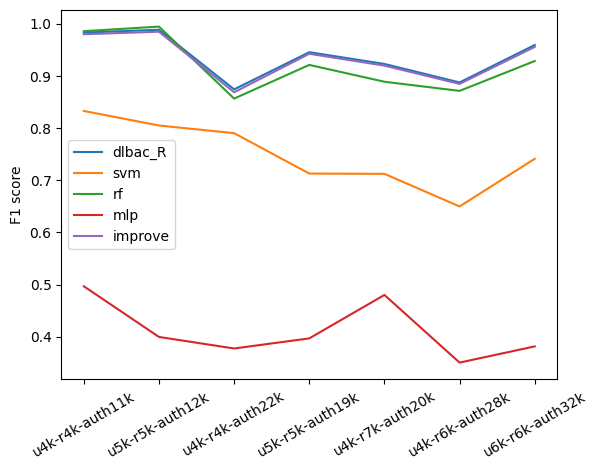

In [2]:
plt.figure(0)
plt.ylabel('F1 score')
plt.xticks(rotation=30)
for model in models:
    data_path = working_directory + '/02-output/' + model + '/'
    y = []
    for d in datasets:
        confusion = load_confusion(data_path, d)
        y.append(f1_score(*confusion))
    plt.plot(datasets, y, label=model)
    print(model, sum(y)/len(y), y)

plt.legend()
plt.show()

## FPR

dlbac_R 0.06238215858893119 [0.01675977653631285, 0.013665743305632503, 0.15987210231814547, 0.043434343434343436, 0.07042751148274644, 0.09332121011737478, 0.03919442292796282]
svm 0.24366976072790422 [0.127663976825988, 0.13277931671283472, 0.42259525712763124, 0.18900112233445568, 0.23683900600635968, 0.2583898164985948, 0.33841982958946554]
rf 0.07918434629432033 [0.00951789778605421, 0.003693444136657433, 0.21529443112176924, 0.05611672278338945, 0.0903309386409139, 0.1049760290957183, 0.07436096049573973]
mlp 0.07133838105848297 [0.08172977446720464, 0.07460757156048015, 0.07447375432986944, 0.0850729517396184, 0.06006359674949947, 0.054637130104149445, 0.06878388845855926]
improve 0.06818385386987229 [0.019863438857852266, 0.013850415512465374, 0.17772448707700506, 0.044668911335578, 0.06665881521611118, 0.10943957678955199, 0.04508133230054222]


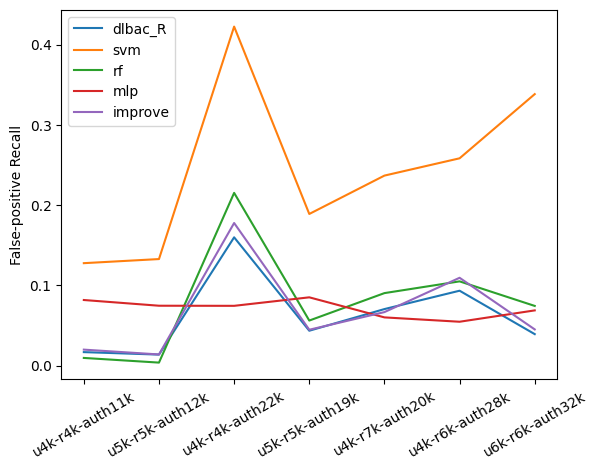

In [3]:
plt.figure(0)
plt.ylabel('False-positive Recall')
plt.xticks(rotation=30)
for model in models:
    data_path = working_directory + '/02-output/' + model + '/'
    y = []
    for d in datasets:
        confusion = load_confusion(data_path, d)
        y.append(fpr_score(*confusion))
    plt.plot(datasets, y, label=model)
    print(model, sum(y)/len(y), y)

plt.legend()
plt.show()

## TPR

dlbac_R 0.9363212547442187 [0.9865311308767472, 0.9924002533248891, 0.8647471111953021, 0.9481988687109258, 0.9248639320323908, 0.8802971931755641, 0.9572102938937109]
svm 0.7497096476007223 [0.8254129606099111, 0.7758074730842305, 0.8494980109869293, 0.6926168502530515, 0.7007832204964821, 0.6192441753806641, 0.7846048423937871]
rf 0.918639097623444 [0.9832274459974587, 0.9932446696221237, 0.8637052472059102, 0.917237272997916, 0.8813221823974512, 0.8618602091359384, 0.9298766560073093]
mlp 0.2813819155796125 [0.3636594663278272, 0.2710576314122863, 0.2450274673233567, 0.27552843108067876, 0.33731581043409, 0.22537149146945515, 0.2517131110095934]
improve 0.934024059665789 [0.9839898348157561, 0.9852227147983956, 0.8647471111953021, 0.9438821077701697, 0.9153059869905747, 0.8895615483397542, 0.955459113750571]


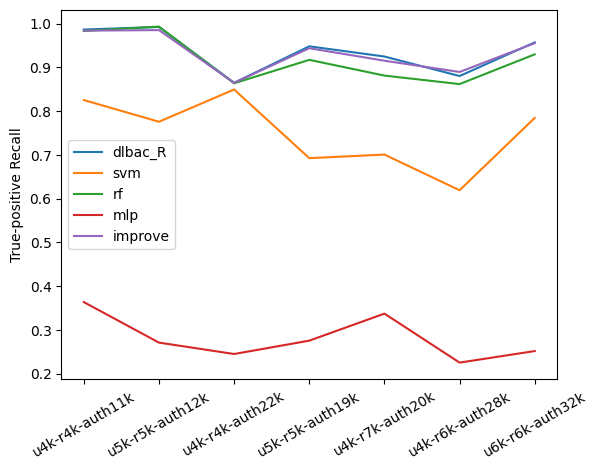

In [4]:
plt.figure(0)
plt.ylabel('True-positive Recall')
plt.xticks(rotation=30)
for model in models:
    data_path = working_directory + '/02-output/' + model + '/'
    y = []
    for d in datasets:
        confusion = load_confusion(data_path, d)
        y.append(tpr_score(*confusion))
    plt.plot(datasets, y, label=model)
    print(model, sum(y)/len(y), y)

plt.legend()
plt.show()

## Precision

dlbac_R 0.9382322403134934 [0.979560938682816, 0.9845026178010471, 0.8838334946757018, 0.942726061861773, 0.9209517514871117, 0.8947417490210703, 0.9613090686649335]
svm 0.7513768470297728 [0.8403622250970246, 0.8363677742375967, 0.7387365126431101, 0.7342591131450213, 0.7241426611796982, 0.683507137794877, 0.7022625051110808]
rf 0.9232740557198577 [0.988250319284802, 0.9957671957671957, 0.8494643688868189, 0.924947463224257, 0.8964353227113151, 0.880930058128633, 0.9271236620359827]
mlp 0.7836058198799678 [0.7836801752464403, 0.7606635071090048, 0.8223140495867769, 0.7094672288233039, 0.8328416912487709, 0.7880051314945478, 0.7882689556509299]
improve 0.9333056133716676 [0.9758064516129032, 0.9841838886545762, 0.8725152905198776, 0.9409407924024336, 0.9241388553813161, 0.8798766104155326, 0.9556774046150331]


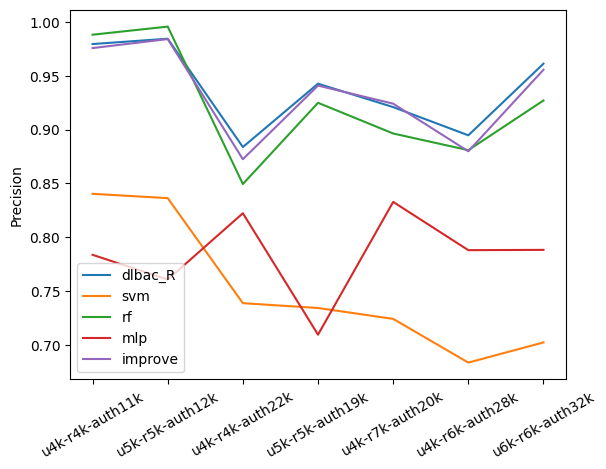

In [5]:
plt.figure(0)
plt.ylabel('Precision')
plt.xticks(rotation=30)
for model in models:
    data_path = working_directory + '/02-output/' + model + '/'
    y = []
    for d in datasets:
        confusion = load_confusion(data_path, d)
        y.append(prec_score(*confusion))
    plt.plot(datasets, y, label=model)
    print(model, sum(y)/len(y), y)

plt.legend()
plt.show()

## Test Accuracy

dlbac_R 0.9374132857142856 [0.984717, 0.989165, 0.854517, 0.952969, 0.927359, 0.894174, 0.958992]
svm 0.7590655714285715 [0.851277, 0.824567, 0.736437, 0.76011, 0.733837, 0.683609, 0.723622]
rf 0.9212621428571428 [0.987226, 0.994878, 0.830879, 0.932429, 0.896343, 0.879304, 0.927776]
mlp 0.6152241428571429 [0.669366, 0.620075, 0.52779, 0.640069, 0.65664, 0.604087, 0.588542]
improve 0.9336047142857143 [0.981866, 0.985717, 0.847099, 0.95041, 0.924863, 0.890087, 0.955191]


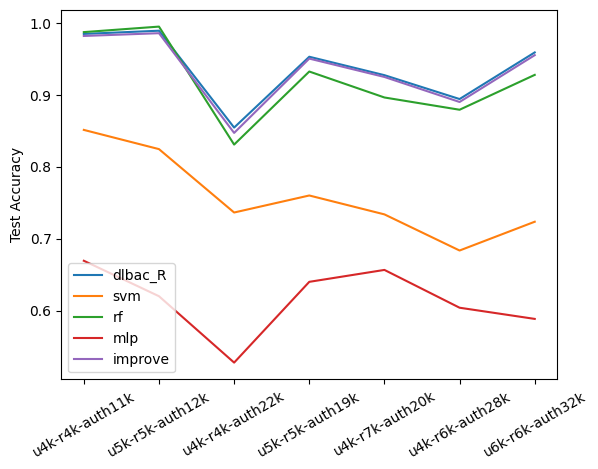

In [6]:
plt.figure(0)
plt.ylabel('Test Accuracy')
plt.xticks(rotation=30)
for model in models:
    data_path = working_directory + '/02-output/' + model + '/'
    y = []
    for d in datasets:
        acc = load_result_param(data_path, d, 'Test accuracy')
        y.append(acc)
    plt.plot(datasets, y, label=model)
    print(model, sum(y)/len(y), y)

plt.legend()
plt.show()

## Train Accuracy

svm 0.7809518571428572 [0.867704, 0.849069, 0.746402, 0.784073, 0.757097, 0.723327, 0.738991]
rf 0.9832912857142856 [1.0, 1.0, 0.960301, 0.982771, 0.971142, 0.981533, 0.987292]
dlbac_R 0.978485814162663 [0.9988600015640259, 0.9999753832817078, 0.9397658705711365, 0.980627715587616, 0.9675859212875366, 0.9774249196052551, 0.9851608872413635]
mlp 0.619927201952253 [0.6762505173683167, 0.6309875845909119, 0.5355635285377502, 0.6438570022583008, 0.6497542858123779, 0.6131250262260437, 0.5899524688720703]
improve 0.9809358716011047 [0.999344527721405, 0.9999014735221863, 0.9524547457695007, 0.9817475080490112, 0.968896210193634, 0.9781531095504761, 0.9860535264015198]


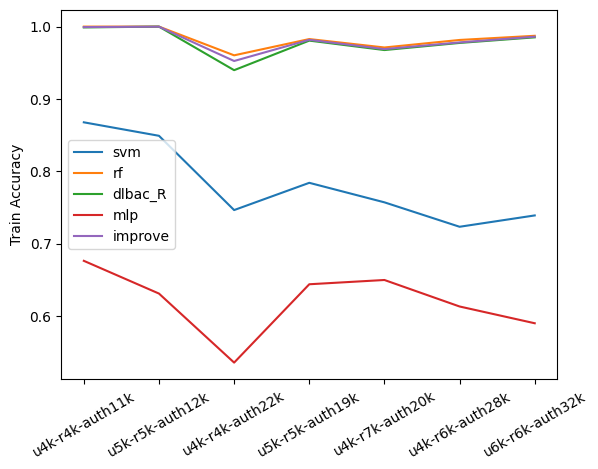

In [9]:

plt.figure(0)
plt.ylabel('Train Accuracy')
plt.xticks(rotation=30)

## for ml
for model in ['svm', 'rf']:
    data_path = working_directory + '/02-output/' + model + '/'
    y = []
    for d in datasets:
        acc = load_result_param(data_path, d, 'Train accuracy')
        y.append(acc)
    plt.plot(datasets, y, label=model)
    print(model, sum(y)/len(y), y)

## for nn
for model in ['dlbac_R', 'mlp', 'improve']:
    data_path = working_directory + '/02-output/' + model + '/'
    y = []
    for d in datasets:
        history = None
        if model == 'dlbac_R':
            history = nn_load_history(data_path, d, 'history_dlbac_alpha')
        elif model == 'improve':
            history = nn_load_history(data_path, d, 'history_dlbac_alpha')
        else: history = nn_load_history(data_path, d, 'history_' + model)
        acc = float(history['binary_accuracy'][-1])
        y.append(acc)
    plt.plot(datasets, y, label=model)
    print(model, sum(y)/len(y), y)

plt.legend()
plt.show()


## Train loss on epochs

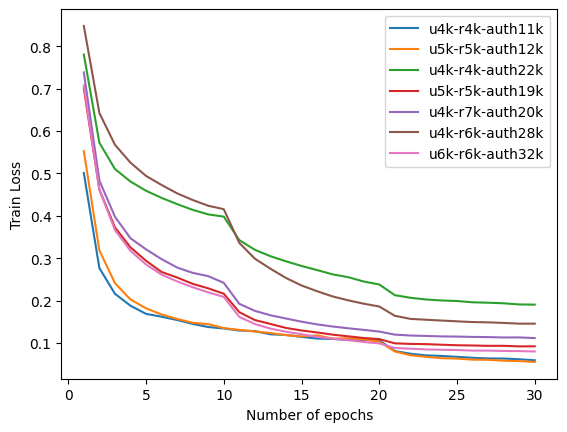

In [10]:
plt.figure(0)
plt.ylabel('Train Loss')
plt.xlabel('Number of epochs')
## for dlbac_R
for d in datasets:
    data_path = working_directory + '/02-output/' + 'dlbac_R' + '/'
    history = nn_load_history(data_path, d, 'history_dlbac_alpha')
    y = history['loss'][0:30]
    x = range(1, len(y) + 1)
    plt.plot(x, y, label=d)
plt.legend()
plt.show()
    
    

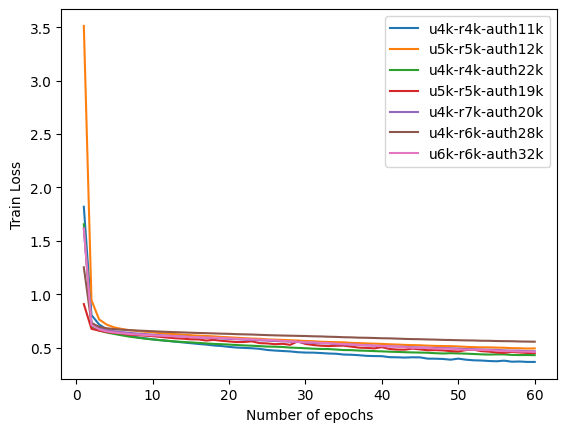

In [9]:
plt.figure(0)
plt.ylabel('Train Loss')
plt.xlabel('Number of epochs')
## for mlp
for d in datasets:
    data_path = working_directory + '/02-output/' + 'mlp' + '/'
    history = nn_load_history(data_path, d, 'history_mlp')
    y = history['loss']
    x = range(1, len(y) + 1)
    plt.plot(x, y, label=d)
plt.legend()
plt.show()
    

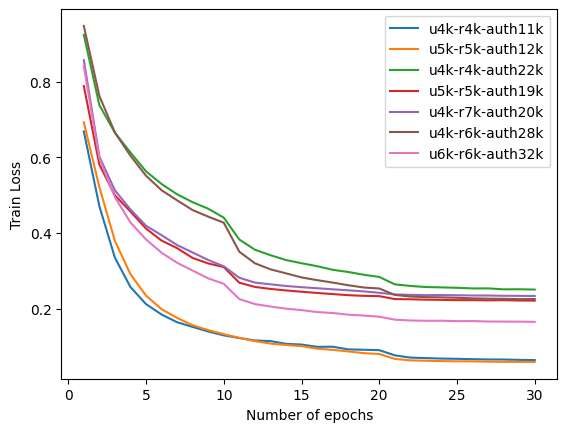

In [11]:
plt.figure(0)
plt.ylabel('Train Loss')
plt.xlabel('Number of epochs')
## for improve
for d in datasets:
    data_path = working_directory + '/02-output/' + 'improve' + '/'
    history = nn_load_history(data_path, d, 'history_dlbac_alpha')
    y = history['loss'][0:30]
    x = range(1, len(y) + 1)
    plt.plot(x, y, label=d)
plt.legend()
plt.show()
    